<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M2_lab15_GD_regression_classification_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형회귀)
### Ex1: Linear regression with two variables (y = wx + b)

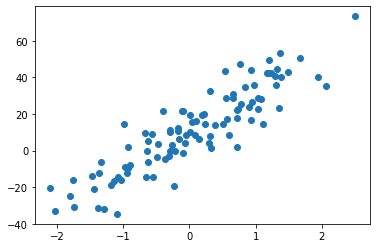

In [1]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [2]:
# --------
w=np.random.randn()   
b=np.random.randn()

lr = 0.2          # learning rate
n_epoch = 200
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* ((y_pred - y)*x).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)
        
print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 603.5063574919998 w= 4.593702023261171 b= 2.479018025269048
epoch= 10 loss= 104.90603461162645 w= 18.671860479920642 b= 9.774931742370061
epoch= 20 loss= 99.68461437072433 w= 20.20137238784193 b= 10.343240942099731
epoch= 30 loss= 99.62622640157379 w= 20.371088097503566 b= 10.380672493562475
epoch= 40 loss= 99.62551893874644 w= 20.390324594560866 b= 10.382048666665773
epoch= 50 loss= 99.62550961538365 w= 20.39255023125878 b= 10.381894015309813
epoch= 60 loss= 99.62550948296376 w= 20.392812691082646 b= 10.381842109138807
epoch= 70 loss= 99.62550948097136 w= 20.392844173544482 b= 10.381832339503678
epoch= 80 loss= 99.6255094809402 w= 20.392848005871883 b= 10.381830783634726
epoch= 90 loss= 99.62550948093968 w= 20.39284847816679 b= 10.381830554511016
epoch= 100 loss= 99.62550948093968 w= 20.392848536962564 b= 10.381830522223268
epoch= 110 loss= 99.62550948093968 w= 20.392848544341465 b= 10.381830517795864
epoch= 120 loss= 99.62550948093966 w= 20.392848545273452 b= 10.381830

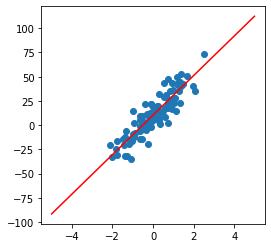

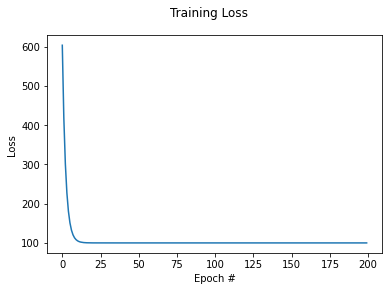

In [3]:

# ------
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-5,5,100) 
yy = w * xx + b
plt.plot(xx,yy,c='r') 
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Ex2: Training two features (x1, x2)  ( y = w1*x1 + w2*x2 + b)

In [4]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n)             # randn=normal distribution in (-1,1), rand=(0,1)
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.2                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)
        
print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 483.4206600830701 w1= 30.37 w2= 44.34 b= 47.78


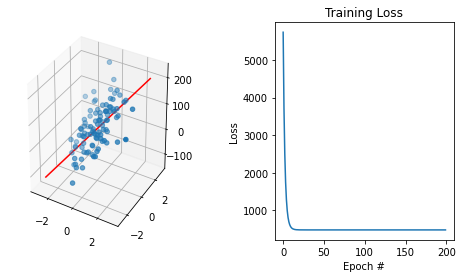

In [5]:
# w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_

plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

### Ex3: Using regression function (LinearRegression)

In [6]:
# ex3: using regression function (LinearRegression)

from sklearn.linear_model import LinearRegression

# X = pd.DataFrame(x1)
# X[1] =x2

X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

model = LinearRegression()        # create model
model.fit(X,y)                    # train model
print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)

# ------
# prediction
new_X=[1,3]
print(model.predict([new_X])) 

z=np.random.rand(10,2)
print(model.predict(z))

score:  0.8561543454405324
w1= 30.37152957580374 w2= 44.340930971053545 b= 47.78366810854856
[211.1779906]
[ 78.4750891  100.44532809  75.80785841  94.75882533  92.41476555
 102.86222993  85.35773384  95.19392496  61.70839343 103.14487926]


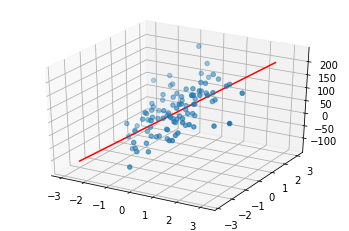

In [7]:
# from mpl_toolkits import mplot3d

w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

### Ex4: Use make_regression

In [8]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=2000, n_features=2, noise=1.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.77111241 176.82634938  55.25266631 -79.36653137 -41.50945283]


In [9]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9996931455705321

# Classification (선형분류)
- Linear classification with two variables
- Logistic Regression
- using CrossEntropy  as loss function
- number of features = 2

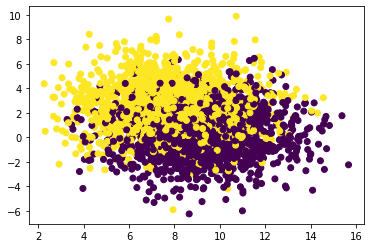

In [42]:
from sklearn.datasets import make_blobs

N = 3000
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [49]:
w1 = np.random.randn()   # initial W value
w2 = np.random.randn()   # initial W value
b = np.random.randn()   # initial b value

def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

lossHistory = []
epochs = 100
alpha = 0.1

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction
    # error = preds - y
    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)
    
    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1
    
    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)

-0.20490280353279341 0.5831152856519041 0.8142022806005024
0.736


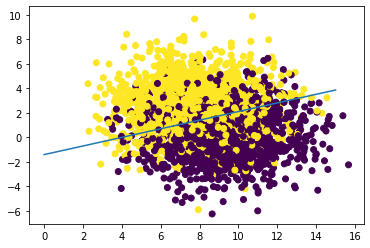

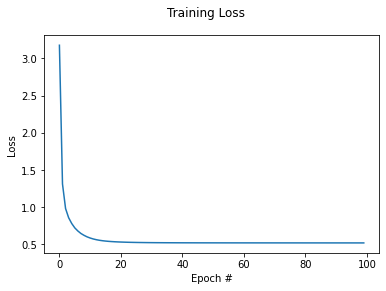

In [50]:
#plt.ylim([-12,10])
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(0,15,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(lossHistory)
# plt.ylim([0.,1.])
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

#### Ex3: use library functions

SGDClassifier:  0.7153333333333334
[[-0.69518581  0.72119774]] [3.66366731]
Score:  0.7153333333333334


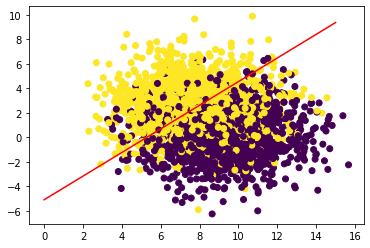

In [56]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

clf = SGDClassifier()      
clf.fit(X[:,:2], y)    
print("SGDClassifier: ", clf.score(X[:, :2],y))
print(clf.coef_, clf.intercept_)
print("Score: ", clf.score(X[:,:2], y))   

w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(0,15,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')
plt.scatter(X[:,0], X[:,1], c=y)

Logistic Regression:  0.7453333333333333
[[-0.3436397   0.56656407]] [2.07714863]
Score:  0.7453333333333333


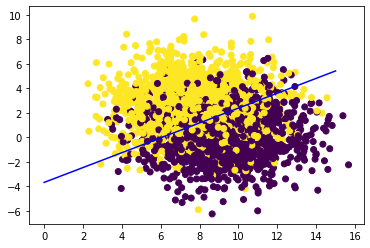

In [57]:
log = LogisticRegression()      
log.fit(X[:,:2], y)    
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
print("Score: ", log.score(X[:,:2], y))   
plt.scatter(X[:,0], X[:,1], c=y)

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(0,15,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')

- end -